In [1]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget


## Task 3.1

In [12]:
def Convdifsolve(g0, N, M, a, d):
     deltaX = 1/N  # rumssteg från x0 till xN-1
     dt = 1/M  # tidsteg från t0 till tN
     Xgrid = np.linspace(0, 1, N+1)
     tgrid = np.linspace(0, 1, M+1)

     T = la.toeplitz([-2, 1] + [0] * (N-1)) ##Skapar en Toeplitz matris för disc av andraderivatan
     T[-1,0] = 1
     T[0,-1] = 1
     T = T/deltaX**2

     S = la.toeplitz([-1, 0] + [0] * (N-1), [-1, 1] + [0] * (N-1)) ##Skapar en Toeplitz matris för disc av förstaderivatan
     S[N,0] = 1
     S = S/deltaX
     
     Xop = (d*T-a*S)*dt/2
     op = np.linalg.inv(np.eye(N+1)-Xop)@(np.eye(N+1)+Xop)

     Y = np.zeros((M+1, N+1)) #Första värdet är tidssteget, andra är x-steget.
     Y[0,:] = g0 #Sätter initialvärden

     for i in range(M):
          Y[i+1,:] = op@np.transpose(Y[i, :])
          #Y[i+1,-1] = Y[i+1,0]
     return Y, Xgrid, tgrid
          


In [3]:
def pulse(x):
    return np.exp(-100*(x-0.5)**2)

In [13]:
def plot3D(Y, Xgrid, tgrid):
     T, X = np.meshgrid(np.transpose(tgrid), Xgrid)

     # Create a 3D plot
     fig = plt.figure(figsize=(10, 10))  # You can adjust the size as needed
     ax = fig.add_subplot(111, projection='3d')
     ax.plot_surface(T, X, np.transpose(Y))

     ax.set_xlabel('Time')
     ax.set_ylabel('Space')
     ax.set_zlabel('Value')

     plt.show()

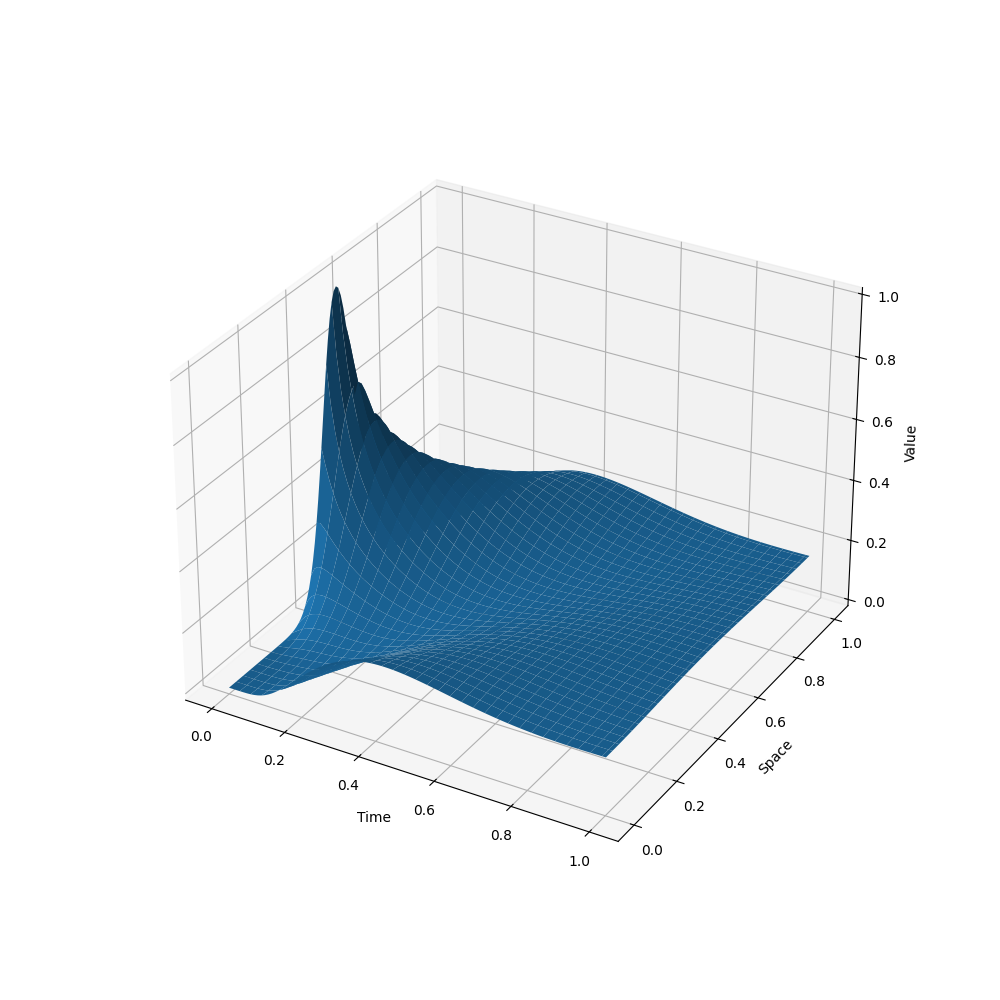

In [15]:
a = 1
d = 0.1
N, M = 100, 100

g0 = pulse(np.linspace(0, 1, N+1))

Y, Xgrid, tgrid = Convdifsolve(g0, N, M, a, d)
plot3D(Y, Xgrid, tgrid)


In [6]:
print(Y[M,int(N/2)])
print(Y[M,int(N)])

3.9511738364663425e+62
-4.093892406615515e+62
